# ALeRCE client starter

Francisco Förster

Last modification: 20221012

Very simple examples on how to interact with the ALeRCE client https://alerce.readthedocs.io/en/latest/index.html.

See https://alerce.readthedocs.io/en/latest/apis.html for the API documentation.

Load libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors

#!pip install alerce

In [2]:
from alerce.core import Alerce

# Initialize alerce api object

Let's start the ALeRCE client

In [3]:
client = Alerce()

We will explore different methods from the client:

* Query global properties of an individual object
* Query properties per band of an individual object
* Query detections of an individual object
* Query image stamps
* Crossmatch with objects in the vicinity
* Query non detections of an individual object
* Query features of an individual object
* Query probabilities of an individual object
* Query global properties of a group of objects

# Query properties for an individual object

We will now query the global properties of one object based on a given object id, ZTF20aaelulu in this case. You can see this object in the website https://alerce.online/object/ZTF20aaelulu.


In [4]:
oid = "ZTF20aaelulu"
query_results = client.query_objects(
        oid=oid,
        format='pandas')
properties = query_results # save for later
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF20aaelulu,259,792,58855.458808,58967.227049,False,False,58,0.440634,None,...,58967.227049,111.684757,185.728862,15.823611,0.000021,0.000015,None,None,None,corr_bulk_0.0.1


The column names are the following

In [5]:
", ".join(query_results)

'oid, ndethist, ncovhist, mjdstarthist, mjdendhist, corrected, stellar, ndet, g_r_max, g_r_max_corr, g_r_mean, g_r_mean_corr, firstmjd, lastmjd, deltajd, meanra, meandec, sigmara, sigmadec, class, classifier, probability, step_id_corr'

The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

# Query properties per band for an indivual object

In [6]:
query_results = client.query_magstats(
        oid=oid,
        format='pandas')
query_results

,fid,stellar,corrected,ndet,ndubious,magmean,magmedian,magmax,magmin,magsigma,maglast,magfirst,firstmjd,lastmjd,step_id_corr
0,1,False,True,31,0,17.011618,16.972418,18.607530,14.300256,None,18.607530,14.916227,58859.523,58967.227,bulk_version_0.0.1
1,2,False,False,27,0,16.311693,16.427551,18.513012,13.859622,None,18.513012,17.279879,58855.543,58965.285,bulk_version_0.0.1


You can see that the results are different statistics in two rows, one per band. The columns are described in here https://alerce.readthedocs.io/en/latest/models.html

In [7]:
", ".join(query_results)

'fid, stellar, corrected, ndet, ndubious, magmean, magmedian, magmax, magmin, magsigma, maglast, magfirst, firstmjd, lastmjd, step_id_corr'

# Query detections, forced photomertries and non-detections for an individual object

Now we obtain a list of all the detections and non-detections (limiting magnitude) in two bands. 

Note that both dataframes include a unique identifier for the telescope (`tid`), which hints at the multi-stream nature of ALeRCE (soon to be available).

In [ ]:
detections = client.query_detections(
        oid=oid,
        format='pandas')
nondetections = client.query_non_detections(
        oid=oid,
        format='pandas')
forcedphotometries = client.query_forced_photometry(
        oid=oid,
        format='pandas')
display(detections)
display(nondetections)
display(forcedphotometries)

,tid,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,...,rfid,has_stamp,corrected,dubious,step_id_corr,phase,parent_candid,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext
0,ztf,58855.542292,1101542291015015004,2,1101542291015,20.367030,1,1101,2.120077,17.279879,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1121521071015015006,NaN,NaN,NaN
1,ztf,58859.481250,1105481241015015001,2,1105481241015,19.761808,1,1105,2.123806,14.768740,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1133425771015015000,NaN,NaN,NaN
2,ztf,58859.522280,1105522281015015000,1,1105522281015,19.590542,1,1105,0.549287,14.916227,...,576120110.0,False,True,False,bulk_1.0.0,0.0,1133425771015015000,14.601364,100.00000,0.021050
3,ztf,58867.440336,1113440331015015001,1,1113440331015,20.265388,1,1113,0.499874,14.300256,...,576120110.0,False,True,False,bulk_1.0.0,0.0,1133425771015015000,14.110689,0.02116,0.025516
4,ztf,58867.481562,1113481561015015006,2,1113481561015,20.348034,1,1113,2.172854,13.859622,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1133425771015015000,NaN,NaN,NaN
5,ztf,58871.442685,1117442681015015004,1,1117442681015,20.396467,1,1117,0.551084,15.030325,...,576120110.0,False,True,False,bulk_1.0.0,0.0,1133425771015015000,14.685591,100.00000,0.017573
6,ztf,58871.502234,1117502231015015005,2,1117502231015,20.242445,1,1117,2.161602,14.170009,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1133425771015015000,NaN,NaN,NaN
7,ztf,58875.456991,1121456991015015006,1,1121456991015,20.504930,1,1121,0.521960,15.676039,...,576120110.0,False,True,False,bulk_1.0.0,0.0,1133425771015015000,15.114477,100.00000,0.014803
8,ztf,58875.521076,1121521071015015006,2,1121521071015,20.243944,1,1121,2.198571,14.676664,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1133425771015015000,NaN,NaN,NaN
9,ztf,58878.360509,1124360501015015005,2,1124360501015,19.797495,1,1124,2.211310,15.056566,...,576120210.0,False,False,False,bulk_1.0.0,0.0,1133425771015015000,NaN,NaN,NaN


,tid,mjd,fid,diffmaglim
0,ztf,58828.547824,1,19.2005
1,ztf,58831.548472,1,19.4442
2,ztf,58833.565347,1,18.8578
3,ztf,58834.523704,2,18.8942
4,ztf,58837.462141,2,19.5815
5,ztf,58837.546817,1,19.6237
6,ztf,58838.569375,2,18.4409
7,ztf,58846.546181,1,20.4808
8,ztf,58846.567025,2,20.4058
9,ztf,58849.503183,1,20.5516


The most important columns for the detections are the time (`mjd`), the unique detection identifier (`candid`), the band (`fid`), the difference magnitude (`magpsf`) and its error (`sigmapsf`). 

The columns for the non-detections are the time (`mjd`), the band (`fid`), and the limiting magnitude (`diffmaglim`).

All the field are explained in here The columns are described in here https://alerce.readthedocs.io/en/latest/models.html.

# Query image stamps

We can also query the image stamps associated to a specific object and candid.

We will use the first candid from the previously queried detections.

In [11]:
stamps = client.get_stamps(oid, detections.iloc[0].candid)
print(stamps)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fb6ebb8a850>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fb6ebb8ac70>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fb6ebb8a4f0>]


The image stamps are a triplet of science, reference and difference images. Let's look at the first image:

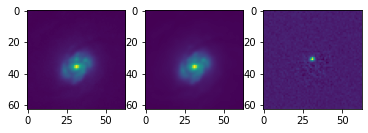

In [12]:
fig, ax = plt.subplots(ncols=3)
for i in range(3):
    ax[i].imshow(stamps[i].data)

We can also directly plot the images stamps using the plot_stamps command.

In [17]:
client.plot_stamps(oid, detections.iloc[0].candid)

If `candid` is not given the last available value will be used.

In [18]:
client.plot_stamps(oid)
print(detections.candid.max())

1213227041015015005


# Crossmatch with objects in the vicinity

We can also crossmatch the object's position with objects from the catsHTM collection of catalogs (https://github.com/maayane/catsHTM). The catalogs included in catsHTM are:

* 2MASS (input name: TMASS)
* 2MASSxsc (input name: TMASSxsc) - 2MASS extended source catalog
* AKARI (input name: AKARI)
* APASS (input name: APASS) - AAVSO All Sky Photometric Sky Survey (~5.5x10^7 sources)
* Cosmos (input name: Cosmos) - Sources in the Cosmos field
* DECaLS (input name: DECaLS) - DECaLS DR5 release
* FIRST (input name: FIRST) - (~9.5x10^5 sources)
* GAIA/DR1 (input name: GAIADR1) - (~1.1x10^9 sources).
* GAIA/DR2 (input name: GAIADR2) - NEW! (~1.6x10^9 sources)
* GAIA/EDR3 (input name: GAIAEDR3) - NEW! (~1.8x10^9 sources)
* GALEX (input name: GALEX) - GALAEX/GR6Plus7 (~1.7x10^8 sources).
* HSC/v2 (input name: HSCv2)- Hubble source catalog
* IPHAS/DR2 (input name: IPHAS)
* NED redshifts (input name: NEDz)
* NVSS (input name: NVSS) - (~1.8x10^6 sources)
* HYPERLEDA (input name: PGC)
* PS1 (input name: PS1) - Pan-STARRS (~2.6x10^9 sources; A cleaned version of the PS1 stack catalog; some missing tiles below declination of zero [being corrected])
* The PTF photometric catalog (input name: PTFpc)
* ROSATfsc (input name: ROSATfsc) - ROSAT faint source catalog
* SDSS/DR10 (input name: SDSSDR10)- Primary sources from SDSS/DR10 (last photometric release)
* Skymapper DR1 (input name: Skymapper)
* SpecSDSS/DR14 (input name: SpecSDSS) - SDSS spectroscopic catalog
* Spitzer/SAGE (input name SAGE)
* Spitzer/IRAC (input name IRACgc) - Spitzer IRAC galactic center survey
* UCAC4 (input name: UCAC4) - (~1.1x10^8 sources)
* UKIDSS/DR10 (input name: UKIDSS)
* USNOB1 (not yet available)
* VISTA/Viking/DR3 (not yet available)
* VST/ATLAS/DR3 (input name: VSTatlas)
* VST/KiDS/DR3 (input name: VSTkids)
* WISE (input name: WISE) - ~5.6x10^8 sources
* XMM (input name: XMM)- 7.3x10^5 sources 3XMM-DR7 (Rosen et al. 2016; A&A 26, 590)
* ZTF-DR1 stellar variability catalog (input name: ztfSrcLCDR1)
* ZTF-DR1 variable star candidates (input name: ztfSrcLCDR1)

In [19]:
ra = properties.meanra
dec = properties.meandec
radius = 120 # arcsec
#catalog_name = "GAIA/DR1"
cone_objects = client.catshtm_conesearch(ra, dec, radius, format="pandas")
cone_objects

{'FIRST':          Dec       Fint   FitMajor   FitMinor   FitPosAng  Fpeak      Major  \
 0  15.797722   5.631805   5.680000   5.580000    0.100000   5.18   1.780000   
 1  15.822169   6.063784  10.550000   5.910000  177.000000   2.84   9.060000   
 2  15.822405  37.346027  18.190001  17.610001   95.199997   3.40  17.370001   
 
    Minor      PosAng          RA  SideProb      StartMJD       StopMJD  \
 0   1.41    0.100000  185.744430  0.014053  2.451504e+06  2.451513e+06   
 1   2.41  177.000000  185.730756  0.014053  2.451504e+06  2.451513e+06   
 2  16.76   95.199997  185.728966  0.014053  2.451504e+06  2.451513e+06   
 
         rms       cat_name  
 0  0.154018  catsHTM_FIRST  
 1  0.150016  catsHTM_FIRST  
 2  0.149799  catsHTM_FIRST  ,
 '2MASS':           Dec         Epoch  ErrMaj MagErr_H MagErr_J MagErr_K   Mag_H  \
 0   15.801813  2.451641e+06    0.23    0.236    0.237     None  15.799   
 1   15.802256  2.451641e+06    0.26     0.23    0.256     None  15.942   
 2   15.8047

We obtained many crossmatches from the [catsHTM](https://arxiv.org/abs/1805.02666_) catalog. Let's look at the catalogs where matches were found:

Let's plot the location of all crossmatches  at the SDSS/DR10 xmatches, highlighting objects with redshift if there are any from the table SpecSDSS.

HSCv2
XMM


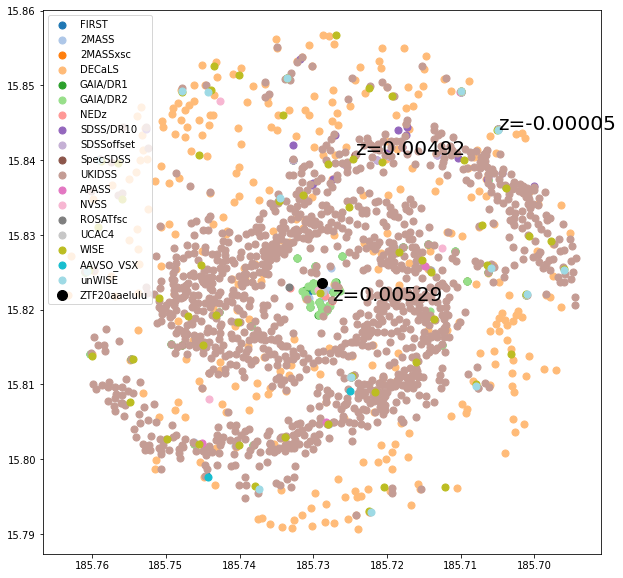

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
cmap = plt.cm.tab20
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(cone_objects.keys()))
for idx, i in enumerate(cone_objects.keys()):
    try:
        aux = cone_objects[i].rename({"RA": "ra", "Dec": "dec"}, axis=1)
        ax.scatter(aux.ra, aux.dec, color=cmap(norm(idx)), label=i, s=50)
        if i == "SpecSDSS": # the table with spectroscopic redshifts
            s = 500
            for idxrow, row in aux.iterrows():
                ax.text(row.ra, row.dec, "z=%.5f" % row.z, fontsize=20)
    except:
        print(i)
        
ax.scatter(ra, dec, c='k', marker='o', s=100, label=oid)
ax.set_xlim(ax.get_xlim()[::-1])
plt.legend()

# Query features for an individual object

Now we will query the features used by our light curve classifier. These are hand made statistics or contextual information based on the object's light curve.

In [29]:
query_results = client.query_features(
        oid=oid,
        format='pandas')
query_results

,name,value,fid,version
0,gal_b,76.900066,0,lc_classifier_1.2.1-P
1,gal_l,271.133944,0,lc_classifier_1.2.1-P
2,g-r_max,0.440634,12,lc_classifier_1.2.1-P
3,g-r_mean,0.734401,12,lc_classifier_1.2.1-P
4,g-r_max_corr,NaN,12,lc_classifier_1.2.1-P
...,...,...,...,...
173,W2-W3,NaN,0,lc_classifier_1.2.1-P
174,g-W2,NaN,0,lc_classifier_1.2.1-P
175,g-W3,NaN,0,lc_classifier_1.2.1-P
176,r-W2,NaN,0,lc_classifier_1.2.1-P


You can see that there are 178 rows, where each row has a feature name (`name`), a value (`value`), a band id (`fid`), and a feature version (`version`).

A detailed explanation of all the features can be found in http://alerce.science/features/.

We can pivot these dataframe to make the features appear as columns. To do this we will add an auxiliary columns that contains the feature name and filter id all in one string, as well as adding the object identifier as a column.

In [43]:
query_results["oid"] = oid
query_results['feature'] = [f"{name}_{fid}" for name, fid in zip(query_results.name, query_results.fid)]

In [44]:
query_results.pivot(index='oid', columns='feature', values='value')

feature,Amplitude_1,Amplitude_2,AndersonDarling_1,AndersonDarling_2,Autocor_length_1,Autocor_length_2,Beyond1Std_1,Beyond1Std_2,Con_1,Con_2,...,n_non_det_before_fid_1,n_non_det_before_fid_2,n_pos_1,n_pos_2,positive_fraction_1,positive_fraction_2,r-W2_0,r-W3_0,rb_0,sgscore1_0
oid,,,,,,,,,,,,,,,,,,,,,
ZTF20aaelulu,1.997787,2.15412,0.982534,0.759591,5.0,3.0,0.37931,0.24,0.0,0.0,...,6.0,5.0,29.0,25.0,1.0,1.0,NaN,NaN,0.845714,0.227482


# Query probabilities for an individual object

Similarly, we can query the classification probabilities for a given object. 

Note that an object can be classified by different classifiers with different versions, which is shown in the columns `classifier_name` and `classifier_version`, respectively.

In [45]:
query_results = client.query_probabilities(
        oid=oid,
        format='pandas')
query_results

,classifier_name,classifier_version,class_name,probability,ranking
0,lc_classifier,hierarchical_rf_1.1.0,SNIa,0.137760,3
1,lc_classifier_periodic,hierarchical_rf_1.1.0,LPV,0.332000,1
2,lc_classifier_stochastic,hierarchical_rf_1.1.0,QSO,0.008000,4
3,lc_classifier_top,hierarchical_rf_1.1.0,Transient,0.984000,1
4,lc_classifier_transient,hierarchical_rf_1.1.0,SNIa,0.140000,3
5,stamp_classifier,stamp_classifier_1.0.0,SN,0.813201,1
6,lc_classifier,hierarchical_rf_1.1.0,SNIbc,0.525456,1
7,lc_classifier_periodic,hierarchical_rf_1.1.0,E,0.090000,5
8,lc_classifier_stochastic,hierarchical_rf_1.1.0,AGN,0.006000,5
9,lc_classifier_top,hierarchical_rf_1.1.0,Stochastic,0.006000,3


We see that we get many rows for a single object. This shows all the probabilities associated to all the ALeRCE classifiers and the classes in their associated taxonomies. The columns indicate the name of the classifier (`classifier_name`), its version (`classifier_version`), the class (`class_name`), the probability (`probability`) and the ranking (`ranking`) growing from most to least likely. 

Let's check the unique classifier versions associated to each classifier:

In [48]:
for clf in query_results.classifier_name.unique():
    mask = query_results.classifier_name == clf
    print(clf, query_results.loc[mask].classifier_version.unique())

lc_classifier ['hierarchical_rf_1.1.0']
lc_classifier_periodic ['hierarchical_rf_1.1.0']
lc_classifier_stochastic ['hierarchical_rf_1.1.0']
lc_classifier_top ['hierarchical_rf_1.1.0']
lc_classifier_transient ['hierarchical_rf_1.1.0']
stamp_classifier ['stamp_classifier_1.0.0']


And now the unique classes associated to each classifier:

In [50]:
for clf in query_results.classifier_name.unique():
    mask = query_results.classifier_name == clf
    print(clf, query_results.loc[mask].class_name.unique())

lc_classifier ['SNIa' 'SNIbc' 'SNII' 'SLSN' 'QSO' 'AGN' 'Blazar' 'CV/Nova' 'YSO' 'LPV'
 'E' 'DSCT' 'RRL' 'CEP' 'Periodic-Other']
lc_classifier_periodic ['LPV' 'E' 'DSCT' 'RRL' 'CEP' 'Periodic-Other']
lc_classifier_stochastic ['QSO' 'AGN' 'Blazar' 'CV/Nova' 'YSO']
lc_classifier_top ['Transient' 'Stochastic' 'Periodic']
lc_classifier_transient ['SNIa' 'SNIbc' 'SNII' 'SLSN']
stamp_classifier ['SN' 'AGN' 'VS' 'asteroid' 'bogus']


The classifiers are two classifiers, the `lc_classifier` and the `stamp_classifier`, where `lc_classifier` is a hierarchical classifier composed of four independent classifiers: `lc_classifier_top`, `lc_classifier_periodic`, `lc_classifier_stochastic`, and `lc_classifier_transient`. You can see more details about these classifiers in [Sánchez-Sáez+2021](https://ui.adsabs.harvard.edu/abs/2021AJ....161..141S/abstract) and [Carrasco-Davis+2021](https://ui.adsabs.harvard.edu/abs/2020arXiv200803309C/abstract). 

`lc_classifier`:
* AGN
* Blazar
* CEP
* CV/Nova
* DSCT
* E
* LPV
* Periodic-Other
* QSO
* RRL
* SLSN
* SNIa
* SNIbc
* SNII
* YSO

`stamp_classifier`:
* AGN
* asteroid
* bogus
* SN
* VS


`lc_classifier_top`:
* Periodic
* Stochastic
* Transient

`lc_classifier_periodic`:
* CEP
* DSCT
* E
* LPV
* Periodic-Other
* RRL

`lc_classifier_stochastic`:
* AGN
* Blazar
* CV/Nova
* QSO
* YSO

`lc_classifier_transient`:
* SLSN
* SNIa
* SNIbc
* SNII

# Query global properties of a set of objects

## Query objects based on the most likely class

We will query the top 200 objects classified SNIa according to the light curve classifier. In here we ask for the top 200 objects in pandas format. By default this query asks for objects with classification `ranking=1`. We will ask for the results to be ordered by probability in descending order (`DESC`).

In [73]:
query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        page_size=200,
        order_by='probability',
        order_mode='DESC',
        format='pandas')

In [74]:
query_results

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF20acobvxk,102,502,59149.448125,59204.198831,False,False,37,-0.185314,0.588599,...,59204.198831,54.750706,37.673533,-14.569121,0.000080,0.000059,SNIa,lc_classifier,0.722000,corr_bulk_0.0.1
1,ZTF22aalpfln,59,2921,59724.250000,59766.250000,False,False,28,-0.179750,NaN,...,59766.241782,41.892627,224.503742,49.953109,0.000049,0.000022,SNIa,lc_classifier,0.722000,dev
2,ZTF21abuyhau,53,2702,59448.184097,59478.194873,False,False,28,-0.180090,0.486082,...,59478.194873,28.030926,244.075462,37.636849,0.000064,0.000032,SNIa,lc_classifier,0.720000,correction_1.0.6
3,ZTF21abywdxt,44,1171,59464.267917,59502.204410,False,False,27,-0.098903,NaN,...,59502.204410,37.007465,326.503610,21.962614,0.000025,0.000023,SNIa,lc_classifier,0.716564,correction_1.0.6
4,ZTF21abufayv,129,1744,59443.328588,59491.236620,False,False,30,-0.000980,NaN,...,59491.235683,44.840289,12.033976,24.440807,0.000031,0.000026,SNIa,lc_classifier,0.712000,correction_1.0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ZTF22aajlruz,85,2280,59707.250000,59756.250000,True,False,30,-0.105828,-0.058674,...,59756.221644,46.873912,219.669774,43.747642,0.000046,0.000044,SNIa,lc_classifier,0.626000,1.1.2
196,ZTF22aavakpj,52,1082,59782.500000,59821.250000,False,False,36,-0.087213,NaN,...,59821.323657,38.893750,358.167133,-17.206410,0.000021,0.000021,SNIa,lc_classifier,0.626000,dev
197,ZTF20acbttnt,72,447,59107.375810,59172.149664,True,False,46,-0.254587,-0.133412,...,59172.149664,64.773854,20.057183,-0.044646,0.000028,0.000033,SNIa,lc_classifier,0.625488,corr_bulk_0.0.1
198,ZTF20abbpory,54,593,58991.450093,59036.363912,False,False,54,0.080822,NaN,...,59036.363912,44.913819,301.033890,71.036374,0.000096,0.000031,SNIa,lc_classifier,0.624748,corr_bulk_0.0.1


Note that now the columns `class`, `classifier`, and `probability` are included.

## Query objects by classified ranking

When an object is classified by our classifiers, a `ranking` column is available to quickly extract the most likely class (`ranking=1`). We can also extract objects that were classified as SNIa as the 2nd or 3rd most likely classes. Note that not asking for a ranking is equivalent to asking for `ranking=1` (the most likely class). 

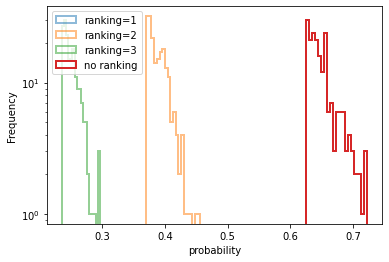

In [75]:
fig, ax = plt.subplots()

for ranking in [1, 2, 3]:
    query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        ranking=ranking,
        page_size=200,
        order_by='probability',
        order_mode='DESC',        format='pandas')
    query_results.probability.plot.hist(bins=20, ax=ax, lw=2, log=True,
                                        alpha=0.5, histtype='step', label="ranking=%i" % ranking)
query_results = client.query_objects(
        classifier="lc_classifier",
        class_name="SNIa",
        page_size=200,
        order_by='probability',
        order_mode='DESC',
        format='pandas')
query_results.probability.plot.hist(bins=20, ax=ax, lw=2, log=True, histtype='step', label="no ranking")

ax.set_xlabel("probability")
plt.legend()

You can see that the probabilities when no ranking is specified and `ranking=1` overlap because `ranking=1` is the default value. Also, the typical probabilities of `ranking=1` > `ranking=2` > `ranking=3`. 

# Let's now generate a link to look at all the previous objects

In [77]:
suffix = "&count=true&page=1&perPage=1000&sortDesc=true&selectedClassifier=lc_classifier"
url = "https://alerce.online/?" + "&".join("oid=%s" % i for i in query_results.oid.iloc[:200]) + suffix
print(url)

https://alerce.online/?oid=ZTF20acobvxk&oid=ZTF22aalpfln&oid=ZTF21abuyhau&oid=ZTF21abywdxt&oid=ZTF21abufayv&oid=ZTF21achqzub&oid=ZTF20acoqlav&oid=ZTF22abdstgi&oid=ZTF19aavounq&oid=ZTF19aclljyq&oid=ZTF19abahvdh&oid=ZTF21abrmefg&oid=ZTF21abaaipx&oid=ZTF20acgznau&oid=ZTF20aaljgcp&oid=ZTF20aakbtyz&oid=ZTF21abhtaiv&oid=ZTF21abbzcxe&oid=ZTF20acynaba&oid=ZTF20abisvtr&oid=ZTF21abflmkk&oid=ZTF21abbytmm&oid=ZTF20aazsyvu&oid=ZTF21abjeyoh&oid=ZTF21aapfowm&oid=ZTF21abrhggj&oid=ZTF21abcouxj&oid=ZTF20aahptds&oid=ZTF18aazjztm&oid=ZTF21abjtqyq&oid=ZTF20accsfkt&oid=ZTF19achejoc&oid=ZTF21abwfnru&oid=ZTF21abwurky&oid=ZTF22aawodgn&oid=ZTF20acpxvez&oid=ZTF18aatjfoe&oid=ZTF19abakjao&oid=ZTF21aahargb&oid=ZTF21aaqafcf&oid=ZTF20acoaqpm&oid=ZTF20acnzcmp&oid=ZTF22aambnsg&oid=ZTF21abasxdp&oid=ZTF20actpatx&oid=ZTF20abatfzl&oid=ZTF20aamgdkb&oid=ZTF20aaeopvv&oid=ZTF20acwxbyr&oid=ZTF20abkacis&oid=ZTF20abcsbux&oid=ZTF22aamfvrs&oid=ZTF21aaqzkhx&oid=ZTF20acbovrt&oid=ZTF20abeeytg&oid=ZTF19aazlsfj&oid=ZTF21abubxmc&oid=ZTF2

Open the link in your browser to see the explore the objects.